<a href="https://colab.research.google.com/github/rachitgithub/Covid-Detection/blob/main/COVID19Training_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install TensorFlow**



In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 54kB/s 


# **Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import TensorFlow and GPU**

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
print(tf.__version__)

2.3.1


# ***Create Directory to save model***

In [ ]:
#!rmdir -p /content/drive/MyDrive/COVID-19-Deep-Learning-Project-Colab/saved_models
!mkdir -p /content/drive/MyDrive/COVID-19-Deep-Learning-Project-Colab/saved_models

rmdir: failed to remove directory '/content/drive/MyDrive/COVID-19-Deep-Learning-Project-Colab': Directory not empty


# Import Keras **Libraries**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Activation, MaxPooling2D,Dense,Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import re
import os

# **Build. Sequential CNN Model**

In [ ]:
def Build_CNN_Model():
    
    # -------------------------------------------------------------------------
    #                        Build CNN Model 
    # -------------------------------------------------------------------------
    model = Sequential()  
    
    #  First Block of CNN
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))   
    
    #  Second Block of CNN
    model.add(Conv2D(64, (3, 3),  padding='same'))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    
    #  Third Block of CNN
    model.add(Conv2D(128, (3, 3), padding='same'))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))      
    
    #  Flatten and Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(1000))
    model.add(Activation('relu'))     
    
    #  Softmax Classifier
    model.add(Dense(2))
    model.add(Activation('softmax'))        
    
    #  Display model
    model.summary()    
	
    # compile model
    opt = SGD(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model      
   

# **Train the CNN model**

In [ ]:
def Train_CNN_Model(model):
    
    # -------------------------------------------------------------------------
    #                        Train CNN Model 
    # -------------------------------------------------------------------------
    
    # create data generators    
    train_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
    valid_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
   
    # prepare iterators
    batch_size=32
    train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/COVID-19-Deep-Learning-Project-Colab/Dataset/train/',classes =('Normal','Covid'),batch_size=batch_size, target_size=(224, 224))
    valid_it = valid_datagen.flow_from_directory('/content/drive/MyDrive/COVID-19-Deep-Learning-Project-Colab/Dataset/val/',classes =('Normal','Covid'),batch_size=batch_size, target_size=(224, 224))


    epochs=100;
    
    history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=valid_it, validation_steps=len(valid_it), epochs=epochs, verbose=1)
    
    
    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

	# save model
    model.save('/content/drive/MyDrive/COVID-19-Deep-Learning-Project-Colab/saved_models/CoVID19-normal_cnn_model.h5')
    

# **Run the build and train functions**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       7

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
46/46 [==============================] - 1049s 23s/step - loss: 0.5985 - accuracy: 0.8373 - val_loss: 0.5233 - val_accuracy: 0.9151
Epoch 2/100
46/46 [==============================] - 52s 1s/step - loss: 0.4474 - accuracy: 0.9139 - val_loss: 0.3978 - val_accuracy: 0.8932
Epoch 3/100
46/46 [==============================] - 51s 1s/step - loss: 0.3287 - accuracy: 0.9146 - val_loss: 0.2935 - val_accuracy: 0.9151
Epoch 4/100
46/46 [==============================] - 50s 1s/step - loss: 0.2578 - accuracy: 0.9241 - val_loss: 0.2485 - val_accuracy: 0.9288
Epoch 5/100
46/46 [==============================] - 50s 1s/step - loss: 0.2179 - accuracy: 0.9289 - val_loss: 0.2181 - val_accuracy: 0.9288
Epoch 6/100
46/46 [==============================] - 49s 1s/step - loss: 0.1954 - accuracy: 0.9323 - val_loss: 0.1895 - val_accuracy: 0.9370
Epoch 7/100
46/46 [==============================] - 49s 1s/step - loss: 0.1753 - accuracy: 0.9371 - val_loss: 0.1763 - val_accuracy: 0.9370
Epoch 8/10

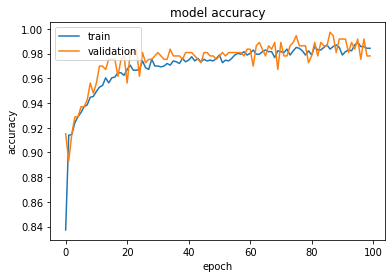

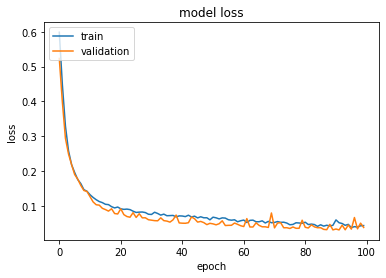

In [ ]:
# main entry 
model = Build_CNN_Model()

Train_CNN_Model(model)

# **Import Keras Libraries**

In [ ]:
from keras.models import Sequential,load_model
from keras.layers import Conv2D,Activation, MaxPooling2D,Dense,Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt_False_Positive_vs_True_Positive

# **Evaluate CNN model**

In [ ]:
def Evaluate_CNN_Model():
    # -------------------------------------------------------------------------
    #                        Evaluate CNN Model 
    # -------------------------------------------------------------------------
    
    # load model
    model = load_model('/content/drive/MyDrive/COVID-19-Deep-Learning-Project-Colab/saved_models/CoVID19-normal_cnn_model.h5')
    
    # load test data
    batch_size=32
    test_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
    test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/COVID-19-Deep-Learning-Project-Colab/Dataset/test/',classes =('Normal','Covid'), 
                                               shuffle=False,batch_size=batch_size, target_size=(224, 224))
    
    y_true = test_it.classes;

    y_pred = model.predict_generator(test_it, steps=len(test_it), verbose=1)

    
    y_pred_prob = y_pred[:,1]

     
    y_pred_binary =  y_pred_prob > 0.5
   
    #Confution Matrix    
    print('\nConfusion Matrix\n -------------------------')    
    print(confusion_matrix(y_true,y_pred_binary));
    
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_true, y_pred_binary)
    print('Accuracy: %f' % accuracy)
    
    
    # precision tp / (tp + fp)
    precision = precision_score(y_true, y_pred_binary)
    print('Precision: %f' % precision)
    
    # recall: tp / (tp + fn)
    recall = recall_score(y_true, y_pred_binary)
    print('Recall: %f' % recall)
    
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_true, y_pred_binary)
    print('F1 score: %f' % f1)    
       
    # ROC AUC
    auc = roc_auc_score(y_true, y_pred_prob)
    print('ROC AUC: %f' % auc)
    
    
    # calculate roc curves
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
        
    # plot the roc curve for the model
    plt.figure()
    plt_False_Positive_vs_True_Positive.plot(fpr, tpr, linestyle='--', label='')
    
    # axis labels
    plt_False_Positive_vs_True_Positive.xlabel('False Positive Rate')
    plt_False_Positive_vs_True_Positive.ylabel('True Positive Rate')
       
    # show the legend
    plt_False_Positive_vs_True_Positive.legend()
    # show the plot
    plt_False_Positive_vs_True_Positive.show()

# **Call the Evaluate CNN model fucntion for output**

Found 31 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1/1 [==============================] - 0s 5ms/step


No handles with labels found to put in legend.



Confusion Matrix
 -------------------------
[[ 4 11]
 [ 0 16]]
Accuracy: 0.645161
Precision: 0.592593
Recall: 1.000000
F1 score: 0.744186
ROC AUC: 0.937500


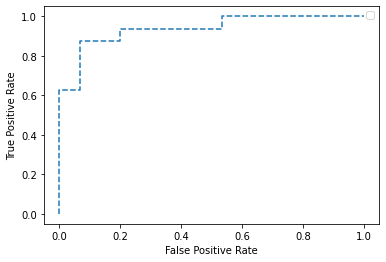

In [ ]:
Evaluate_CNN_Model ()

In [ ]:
from keras.models import Model,load_model
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array

# **Visualize CNN Model**

In [ ]:
def Visualize_CNN_Model():
    # -------------------------------------------------------------------------
    #                        Visualize CNN Model 
    # -------------------------------------------------------------------------
    # load model
    model = load_model('/content/drive/MyDrive/COVID-19-Deep-Learning-Project-Colab/saved_models/CoVID19-normal_cnn_model.h5')
    
    # load the image    
    img = load_img("/content/drive/MyDrive/COVID-19-Deep-Learning-Project-Colab/data-COVID/test/Covid/covid-19-pneumonia-15-L.jpg", target_size=(224, 224))              
    
    # convert to array
    img = img_to_array(img)

    # reshape and scale image
    img = img.reshape(1, 224, 224, 3)
    img = img.astype('float32')    
    img = img / 255             

    # create a new CNN activation_model
    layer_outputs = [layer.output for layer in model.layers[:10]]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    
    # pass image through CNN activation_model 
    activations = activation_model.predict(img)

    # Vislalize intermediate layre    
    Display_Activation_Layers(activations, 4, 2, 3)
    
    Display_Activation_Layers(activations, 5, 2, 7)
 
    Display_Activation_Layers(activations, 7, 2, 9)

In [ ]:
def Display_Activation_Layers(activations, col_size, row_size, act_index): 
    
    activation = activations[act_index]
    
    activation_index=0
    
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    
    for row in range(0,row_size):
    
        for col in range(0,col_size):
        
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            
            ax[row][col].axis('off')
            
            activation_index += 1         

IndexError: ignored

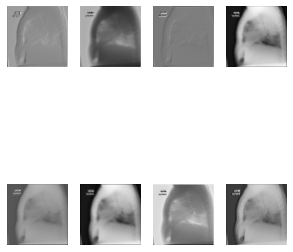

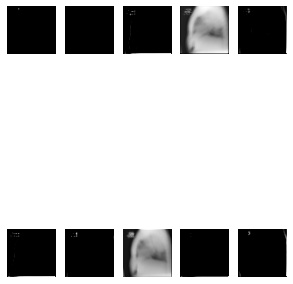

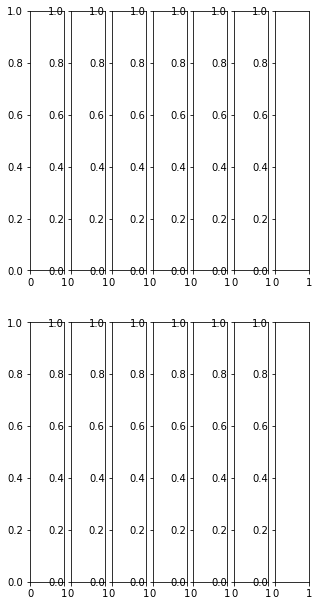

In [ ]:
# main entry            
Visualize_CNN_Model()